#Abstracto, motivación y audiencia#

---


Título: Análisis de datos de estadísticas individuales de jugadores de la NBA: Un enfoque motivador hacia el rendimiento y la toma de decisiones estratégicas.

Resumen:
El proyecto se enfoca en el análisis de estadísticas individuales de jugadores de la NBA, un conjunto de datos de gran relevancia en el ámbito comercial de la liga. Estos datos brindan múltiples oportunidades para el análisis del rendimiento de jugadores y equipos, comparaciones entre jugadores, seguimiento de tendencias y toma de decisiones estratégicas durante los partidos. Además de ser útiles para los entrenadores al evaluar la contribución de jugadores específicos, identificar fortalezas y debilidades individuales, y mejorar el desempeño general, los datos también tienen un valor comercial significativo. Los conocimientos obtenidos pueden aprovecharse para crear campañas y estrategias que aprovechen las fortalezas identificadas o mitiguen posibles problemas revelados por los datos. Además, los datos son una valiosa herramienta para los fanáticos del baloncesto, ya que les permiten realizar un seguimiento detallado de sus jugadores favoritos y mantenerse informados sobre la liga en general.

El objetivo principal de este proyecto es proporcionar una visión motivadora y perspicaz del rendimiento de los jugadores y su impacto en el éxito del equipo. Se emplean técnicas de análisis y ciencia de datos para explorar diversas métricas clave, como puntos anotados, rebotes, asistencias, porcentaje de tiros, y facturación, entre otras.

El análisis se dirige a una audiencia diversa que incluye entrenadores, ejecutivos de equipos de la NBA, así como fanáticos apasionados del baloncesto. Los entrenadores y ejecutivos encontrarán información valiosa sobre el rendimiento individual de los jugadores, lo que les permitirá tomar decisiones informadas al formar alineaciones, realizar cambios tácticos y evaluar el impacto de los jugadores en diferentes situaciones de juego.

Por otro lado, los fanáticos del baloncesto podrán profundizar su comprensión del juego a través de un análisis detallado de las estadísticas individuales de los jugadores más destacados de la NBA. Esto les brindará una mejor apreciación del rendimiento de sus jugadores favoritos y les proporcionará un contexto más sólido para participar en discusiones y debates sobre el baloncesto.

Este estudio no solo tiene como objetivo brindar información estadística, sino también inspirar a jugadores, entrenadores y fanáticos a través de una comprensión más profunda del juego y los factores que influyen en el éxito en la NBA. Al revelar patrones, tendencias y correlaciones ocultas en los datos, este análisis se presenta como una herramienta poderosa para mejorar el rendimiento y tomar decisiones estratégicas respaldadas por evidencia.

# Comprensión de los datos
---

En esta fase inicial del proyecto, se realiza un análisis exhaustivo del conjunto de datos para obtener una comprensión profunda de su estructura, contenido y características fundamentales. Se exploran las diferentes variables presentes, sus tipos y distribuciones. Además, se identifican posibles relaciones entre variables mediante análisis de correlación u otras técnicas relevantes. Este proceso de comprensión sienta las bases para la toma de decisiones informadas en etapas posteriores del análisis, permitiendo obtener una visión completa del conjunto de datos antes de proceder con el modelado y la interpretación de resultados.


In [ ]:
# Importar libreria pandas
import pandas as pd

# Cargar archivo desde Github
url = 'https://raw.githubusercontent.com/HumanoTipoC/Data_Science_Coderhouse/main/NBA%20player%20status%20fro%202003-2023.csv'
df = pd.read_csv(url,index_col=0, sep=",", encoding='cp1252')

In [ ]:
# Visualizacion preliminar de algunas lineas
df.head(5)

,Tm,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 28
Player,,,,,,,,,,,,,,,,,,,,,
Efe Abogidi,GLI,28.0,4,0,48,6,14,0.429,0,0,...,3,10,13,4,0,0,3,10,12,NaN
Jalen Adaway,AUS,27.0,11,2,234,26,61,0.426,7,23,...,7,16,23,11,4,4,3,16,63,NaN
James Akinjo,WES,31.0,15,5,448,90,195,0.462,28,77,...,4,46,50,101,20,0,34,30,232,NaN
Warith Alatishe,ONT,25.0,14,7,337,48,78,0.615,0,1,...,47,57,104,14,16,28,12,47,102,NaN
Ty-Shon Alexander,GBO,24.0,16,0,257,39,77,0.506,27,54,...,2,29,31,23,5,3,17,10,112,NaN


In [ ]:
# Como el dataset esta en ingles se cambia el nombre de las columnas para que sea mas sencillo usarlas
df=df.rename(columns={'Tm': 'Equipo','Age':'Edad','G':'Juegos','GS':'Juegos_ini','MP':'Min_jugados','FG':'Anotaciones','FGA':'Intentos_anotacion','FG%':'%_anotaciones','3P':'Anotaciones_3pts','3PA':'Intentos_anotacion_3pts','3P%':'%_intentos_anotacion_3pts','2P':'Anotaciones_2pts','2PA':'Intentos_anotacion_2pts','2P%':'%_intentos_anotacion_2pts','eFG%':'%_anotaciones_efectivas','FT':'Tiros_l','FTA':'Intentos_tiro_l','FT%':'%_intentos_tiro_l','ORB':'Rebotes_ofensivos','DRB':'Rebotes_defensivos','TRB':'Total_rebotes','AST':'Asistencias','STL':'Robo','BLK':'Bloqueos','TOV':'Facturacion','PF':'Faltas','PTS':'Puntos'})


In [ ]:
# Se puede ver que los tipos de datos de Equipo y Edad no son correctos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2376 entries, Efe Abogidi to Ime Udoka
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Equipo                     2376 non-null   object 
 1   Edad                       2206 non-null   float64
 2   Juegos                     2376 non-null   int64  
 3   Juegos_ini                 2376 non-null   int64  
 4   Min_jugados                2376 non-null   int64  
 5   Anotaciones                2376 non-null   int64  
 6   Intentos_anotacion         2376 non-null   int64  
 7   %_anotaciones              2310 non-null   float64
 8   Anotaciones_3pts           2376 non-null   int64  
 9   Intentos_anotacion_3pts    2376 non-null   int64  
 10  %_intentos_anotacion_3pts  1938 non-null   float64
 11  Anotaciones_2pts           2376 non-null   int64  
 12  Intentos_anotacion_2pts    2376 non-null   int64  
 13  %_intentos_anotacion_2pts  2279 non-nu

In [ ]:
# Se observan valores atipicos en la edad tales como 1 y 8 en jugadores mayores de edad ademas de datos NaN
df.Edad.unique()

array([28., 27., 31., 25., 24., 26., 21., 29., 22., 20., 23., 19., 30.,
       32., 33., 18., 39.,  1., 36., nan, 37., 17., 38., 34., 35.,  8.])

In [ ]:
# Filtrar el DataFrame por jugadores con edad menor a 17
edad_atipica = df.loc[df['Edad'] < 17]

# Imprimir los jugadores encontrados
print(edad_atipica)

              Equipo  Edad  Juegos  Juegos_ini  Min_jugados  Anotaciones  \
Player                                                                     
Caio Pacheco     MXC   1.0      16           7          386           39   
Sean Barnette    RGV   8.0       2           0           10            1   

               Intentos_anotacion  %_anotaciones  Anotaciones_3pts  \
Player                                                               
Caio Pacheco                  109          0.358                16   
Sean Barnette                   2          0.500                 0   

               Intentos_anotacion_3pts  ...  Rebotes_ofensivos  \
Player                                  ...                      
Caio Pacheco                        49  ...                  8   
Sean Barnette                        0  ...                  0   

               Rebotes_defensivos  Total_rebotes  Asistencias  Robo  Bloqueos  \
Player                                                              

In [ ]:
# Se genera una suma de los valores nulos
df.isnull().sum()

Equipo                          0
Edad                          170
Juegos                          0
Juegos_ini                      0
Min_jugados                     0
Anotaciones                     0
Intentos_anotacion              0
%_anotaciones                  66
Anotaciones_3pts                0
Intentos_anotacion_3pts         0
%_intentos_anotacion_3pts     438
Anotaciones_2pts                0
Intentos_anotacion_2pts         0
%_intentos_anotacion_2pts      97
%_anotaciones_efectivas        66
Tiros_l                         0
Intentos_tiro_l                 0
%_intentos_tiro_l             357
Rebotes_ofensivos               0
Rebotes_defensivos              0
Total_rebotes                   0
Asistencias                     0
Robo                            0
Bloqueos                        0
Facturacion                     0
Faltas                          0
Puntos                          0
Unnamed: 28                  2373
dtype: int64

In [ ]:
# Se puede explorar para tratar de identificar porque hay jugadores con datos NaN
df[df["%_anotaciones"].isnull()]

,Equipo,Edad,Juegos,Juegos_ini,Min_jugados,Anotaciones,Intentos_anotacion,%_anotaciones,Anotaciones_3pts,Intentos_anotacion_3pts,...,Rebotes_ofensivos,Rebotes_defensivos,Total_rebotes,Asistencias,Robo,Bloqueos,Facturacion,Faltas,Puntos,Unnamed: 28
Player,,,,,,,,,,,,,,,,,,,,,
Maurice Calloo,WCB,23.0,1,0,4,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,NaN
Ty Jerome,SCW,25.0,1,0,0,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,NaN
Wayne Stewart,SXF,29.0,1,0,1,0,0,NaN,0,0,...,0,0,0,0,0,0,0,1,0,NaN
McKinley Wright IV,TEX,24.0,1,0,0,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,NaN
Kaleb Johnson,AUS,NaN,1,0,4,0,0,NaN,0,0,...,1,0,1,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brandon Mason,ABQ,24.0,1,0,3,0,0,NaN,0,0,...,0,0,0,0,1,0,0,0,0,NaN
Jonathan Moore,FLO,23.0,1,0,8,0,0,NaN,0,0,...,0,1,1,0,0,0,0,1,2,NaN
Kipp Christianson,CHS,29.0,1,0,6,0,0,NaN,0,0,...,1,0,1,0,2,1,0,0,0,NaN


In [ ]:
# Incluso algunos tienen mas de un campo con datos NaN
df[df["Edad"].isnull() & df["%_anotaciones"].isnull() & df["%_intentos_anotacion_3pts"].isnull() & df["%_intentos_anotacion_2pts"].isnull() & df["%_anotaciones_efectivas"].isnull() & df["%_intentos_tiro_l"].isnull()]

,Equipo,Edad,Juegos,Juegos_ini,Min_jugados,Anotaciones,Intentos_anotacion,%_anotaciones,Anotaciones_3pts,Intentos_anotacion_3pts,...,Rebotes_ofensivos,Rebotes_defensivos,Total_rebotes,Asistencias,Robo,Bloqueos,Facturacion,Faltas,Puntos,Unnamed: 28
Player,,,,,,,,,,,,,,,,,,,,,
Kaleb Johnson,AUS,NaN,1,0,4,0,0,NaN,0,0,...,1,0,1,0,0,0,0,0,0,NaN
Princepal Singh,GLI,NaN,1,0,2,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,NaN
Trey Landers,CLC,NaN,1,0,4,0,0,NaN,0,0,...,0,1,1,0,1,0,0,0,0,NaN
Barra Njie,DEL,NaN,1,0,4,0,0,NaN,0,0,...,0,0,0,0,0,0,2,0,0,NaN
Nate Hickman,WES,NaN,1,0,1,0,0,NaN,0,0,...,0,0,0,0,0,0,1,1,0,NaN
Ronshad Shabazz,CPS,NaN,2,0,2,0,0,NaN,0,0,...,0,0,0,1,0,0,0,0,0,NaN
Wyatt Walker,SLC,NaN,2,0,6,0,0,NaN,0,0,...,0,0,0,0,0,0,1,2,0,NaN
Nate Hickman,WES,NaN,1,0,1,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,NaN
Uche Ofoegbu,RAP,NaN,1,0,1,0,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,NaN


# Limpieza de datos
---

La limpieza de datos es un paso fundamental para garantizar la integridad y fiabilidad de los resultados. En esta sección, se detallan las técnicas y enfoques empleados para abordar datos faltantes, valores atípicos y otras irregularidades para mejorar la calidad del conjunto de datos utilizado en el análisis.

In [ ]:
# Se elimina la columna Unnamed: 28
df = df.drop('Unnamed: 28', axis=1)

In [ ]:
# Eliminar datos Nan de las siguientes columnas
df = df.dropna(subset=["Edad", "%_anotaciones", "%_intentos_anotacion_3pts", "%_intentos_anotacion_2pts", "%_anotaciones_efectivas", "%_intentos_tiro_l"])

In [ ]:
# Se verifica que no existan datos Nan
df.isnull().sum()

Equipo                       0
Edad                         0
Juegos                       0
Juegos_ini                   0
Min_jugados                  0
Anotaciones                  0
Intentos_anotacion           0
%_anotaciones                0
Anotaciones_3pts             0
Intentos_anotacion_3pts      0
%_intentos_anotacion_3pts    0
Anotaciones_2pts             0
Intentos_anotacion_2pts      0
%_intentos_anotacion_2pts    0
%_anotaciones_efectivas      0
Tiros_l                      0
Intentos_tiro_l              0
%_intentos_tiro_l            0
Rebotes_ofensivos            0
Rebotes_defensivos           0
Total_rebotes                0
Asistencias                  0
Robo                         0
Bloqueos                     0
Facturacion                  0
Faltas                       0
Puntos                       0
dtype: int64

In [ ]:
# Ahora que no hay datos NaN se cambian los tipos de los datos para tener un formato correcto
df['Equipo'] = df['Equipo'].astype('string')
df['Edad'] = df['Edad'].astype('int64')

In [ ]:
# Se buscan duplicados
df.duplicated().sum()

0

In [ ]:
#df = df.drop_duplicated()

In [ ]:
# Con el metodo describe se puede ver un dato extraño en la columna Edad que muestra el minimo de edad 1 lo que no corresponde claramente.
# El jugador que tenia 8 años fue eliminado con la limpieza de datos NaN
df.describe()

,Edad,Juegos,Juegos_ini,Min_jugados,Anotaciones,Intentos_anotacion,%_anotaciones,Anotaciones_3pts,Intentos_anotacion_3pts,%_intentos_anotacion_3pts,...,%_intentos_tiro_l,Rebotes_ofensivos,Rebotes_defensivos,Total_rebotes,Asistencias,Robo,Bloqueos,Facturacion,Faltas,Puntos
count,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,...,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000
mean,24.784350,11.985213,6.407270,305.809612,53.325323,114.819470,0.454241,15.706716,44.640173,0.313113,...,0.742283,13.870610,42.000616,55.871226,31.252002,11.354282,5.994455,20.536661,25.933457,145.637092
std,3.101899,12.007798,8.629366,319.561250,60.352603,128.659115,0.106481,22.547558,60.254218,0.178723,...,0.195133,19.817802,49.025931,66.478324,43.103151,13.692395,9.607300,24.344850,28.010972,164.095460
min,1.000000,1.000000,0.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.000000,1.000000,65.000000,10.000000,23.000000,0.400000,2.000000,6.000000,0.238000,...,0.667000,2.000000,7.000000,10.000000,5.000000,2.000000,1.000000,4.000000,5.000000,28.000000
50%,24.000000,7.000000,3.000000,169.000000,28.000000,60.000000,0.455000,6.000000,18.000000,0.333000,...,0.750000,7.000000,21.000000,28.000000,14.000000,6.000000,3.000000,11.000000,15.000000,77.000000
75%,26.000000,18.000000,9.000000,463.500000,78.000000,165.500000,0.510000,19.000000,58.000000,0.400000,...,0.868000,18.000000,60.000000,79.000000,40.000000,16.000000,7.000000,29.000000,38.000000,216.500000
max,39.000000,44.000000,42.000000,1518.000000,321.000000,715.000000,1.000000,152.000000,382.000000,1.000000,...,1.000000,170.000000,339.000000,509.000000,325.000000,96.000000,99.000000,152.000000,149.000000,831.000000


In [ ]:
#Cambiar edad de Caio Pacheco, de 1 a 24
df.at["Caio Pacheco", "Edad"] = 24

In [ ]:
df.shape

(1623, 27)

# Estadisticas descriptivas
---

Antes de proceder con el análisis en profundidad, es crucial comprender la naturaleza de los datos. Aquí, se presentan estadísticas descriptivas completas que resumen y describen el conjunto de datos. Estos análisis exploratorios facilitan la identificación de patrones y puntos destacados, proporcionando una base sólida para el análisis posterior.

In [ ]:
# Ahora hay datos mas acordes para trabajar
# Como ejemplo Edad tiene una media de 24.7, desviacion de 3.04, valor minimo de 17 y maximo de 39.
df.describe()

,Edad,Juegos,Juegos_ini,Min_jugados,Anotaciones,Intentos_anotacion,%_anotaciones,Anotaciones_3pts,Intentos_anotacion_3pts,%_intentos_anotacion_3pts,...,%_intentos_tiro_l,Rebotes_ofensivos,Rebotes_defensivos,Total_rebotes,Asistencias,Robo,Bloqueos,Facturacion,Faltas,Puntos
count,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,...,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000,1623.000000
mean,24.798521,11.985213,6.407270,305.809612,53.325323,114.819470,0.454241,15.706716,44.640173,0.313113,...,0.742283,13.870610,42.000616,55.871226,31.252002,11.354282,5.994455,20.536661,25.933457,145.637092
std,3.045192,12.007798,8.629366,319.561250,60.352603,128.659115,0.106481,22.547558,60.254218,0.178723,...,0.195133,19.817802,49.025931,66.478324,43.103151,13.692395,9.607300,24.344850,28.010972,164.095460
min,17.000000,1.000000,0.000000,6.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.000000,1.000000,65.000000,10.000000,23.000000,0.400000,2.000000,6.000000,0.238000,...,0.667000,2.000000,7.000000,10.000000,5.000000,2.000000,1.000000,4.000000,5.000000,28.000000
50%,24.000000,7.000000,3.000000,169.000000,28.000000,60.000000,0.455000,6.000000,18.000000,0.333000,...,0.750000,7.000000,21.000000,28.000000,14.000000,6.000000,3.000000,11.000000,15.000000,77.000000
75%,26.000000,18.000000,9.000000,463.500000,78.000000,165.500000,0.510000,19.000000,58.000000,0.400000,...,0.868000,18.000000,60.000000,79.000000,40.000000,16.000000,7.000000,29.000000,38.000000,216.500000
max,39.000000,44.000000,42.000000,1518.000000,321.000000,715.000000,1.000000,152.000000,382.000000,1.000000,...,1.000000,170.000000,339.000000,509.000000,325.000000,96.000000,99.000000,152.000000,149.000000,831.000000


array([[<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'Juegos'}>,
        <Axes: title={'center': 'Juegos_ini'}>,
        <Axes: title={'center': 'Min_jugados'}>,
        <Axes: title={'center': 'Anotaciones'}>],
       [<Axes: title={'center': 'Intentos_anotacion'}>,
        <Axes: title={'center': '%_anotaciones'}>,
        <Axes: title={'center': 'Anotaciones_3pts'}>,
        <Axes: title={'center': 'Intentos_anotacion_3pts'}>,
        <Axes: title={'center': '%_intentos_anotacion_3pts'}>],
       [<Axes: title={'center': 'Anotaciones_2pts'}>,
        <Axes: title={'center': 'Intentos_anotacion_2pts'}>,
        <Axes: title={'center': '%_intentos_anotacion_2pts'}>,
        <Axes: title={'center': '%_anotaciones_efectivas'}>,
        <Axes: title={'center': 'Tiros_l'}>],
       [<Axes: title={'center': 'Intentos_tiro_l'}>,
        <Axes: title={'center': '%_intentos_tiro_l'}>,
        <Axes: title={'center': 'Rebotes_ofensivos'}>,
        <Axes: title={'center': '

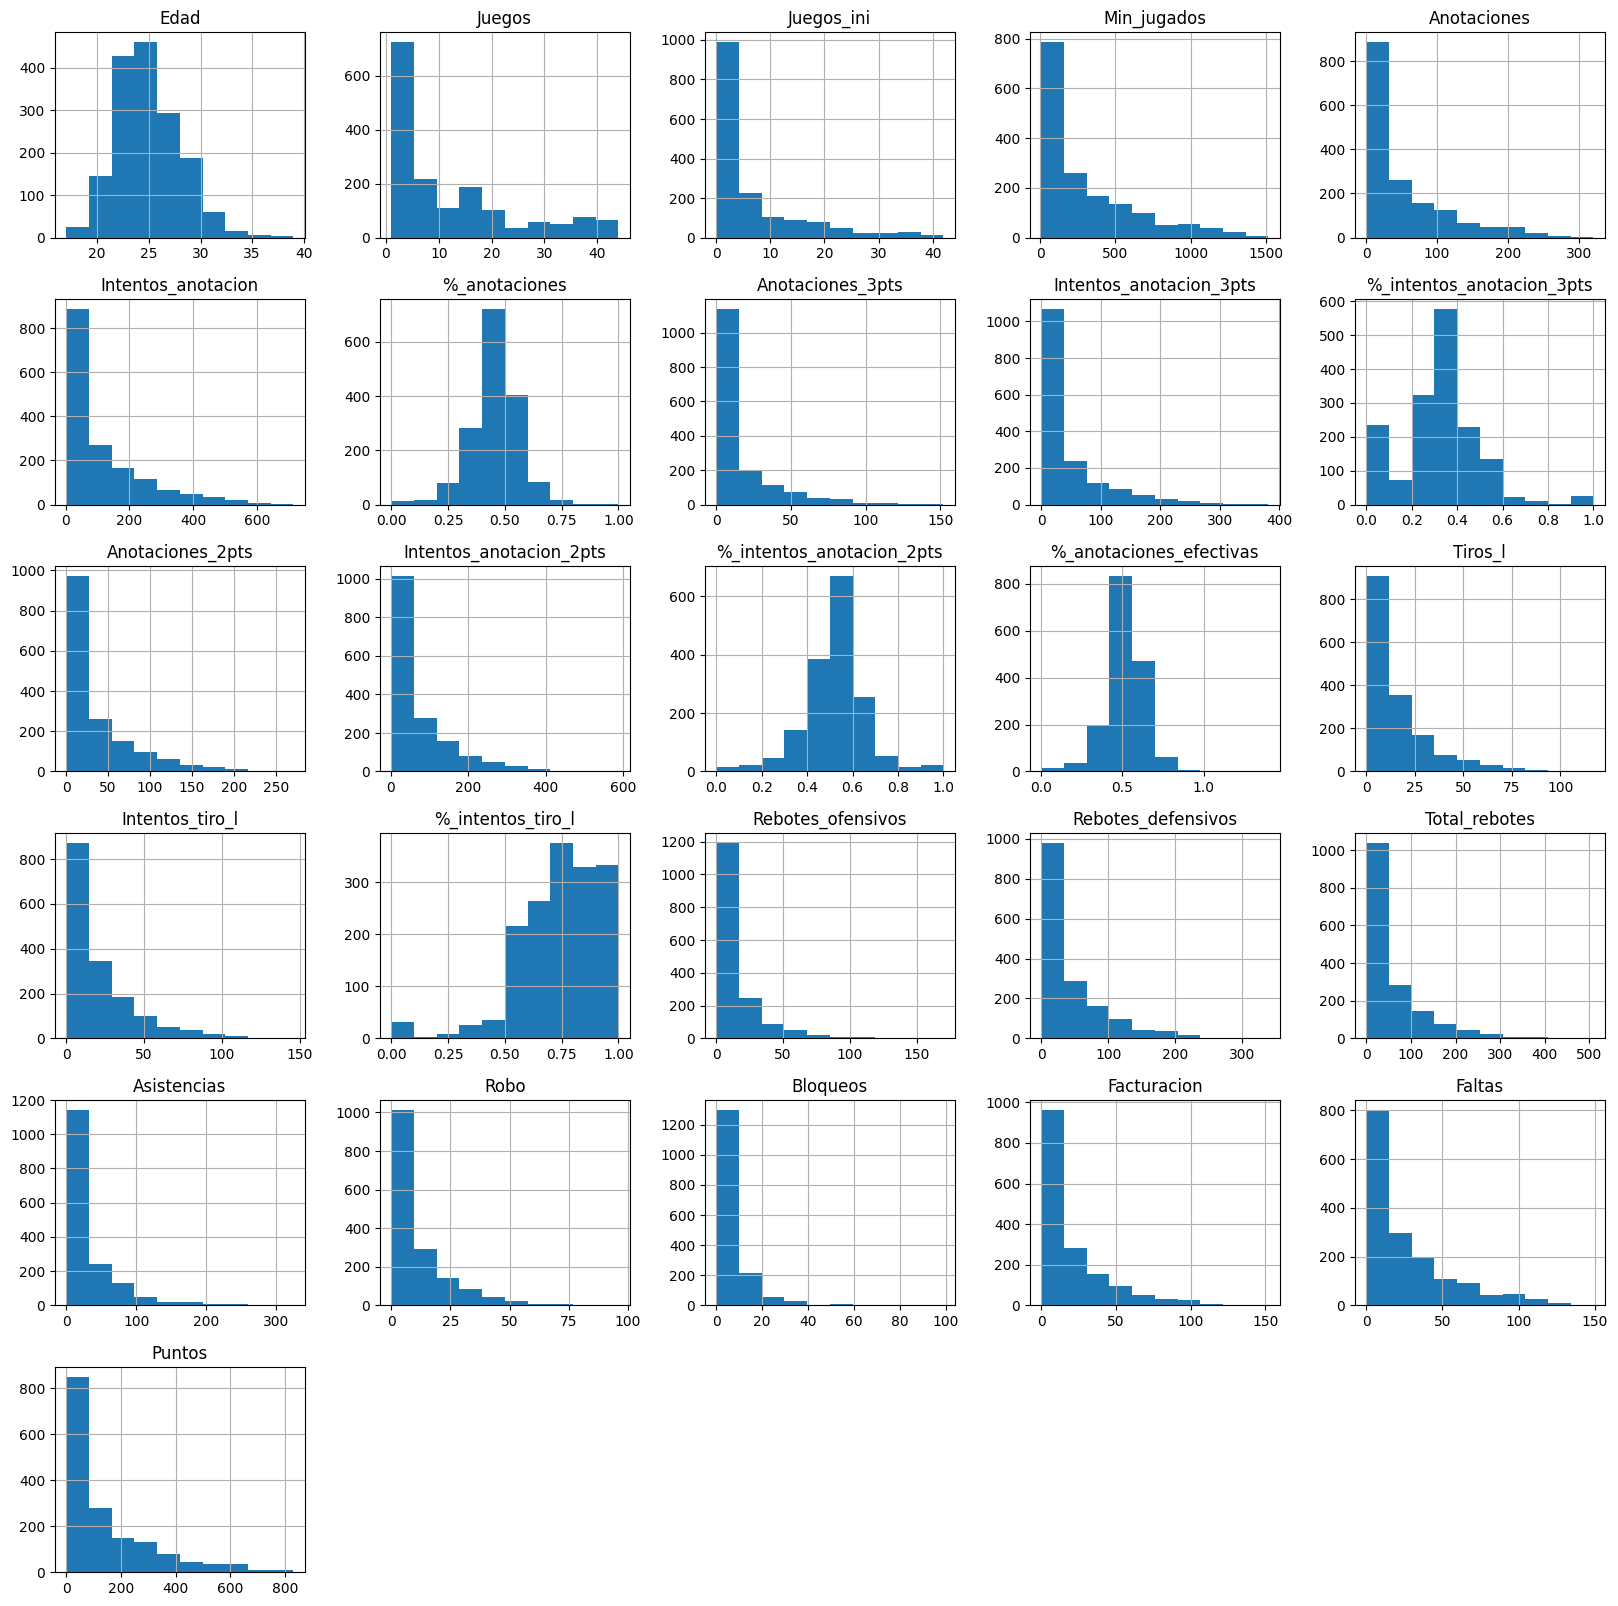

In [ ]:
# Representacion de las variables a traves de histograma
df.hist(figsize = (20, 20))

In [ ]:
# Para ver la correlacion de las variables
df.corr()

<ipython-input-24-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Edad,Juegos,Juegos_ini,Min_jugados,Anotaciones,Intentos_anotacion,%_anotaciones,Anotaciones_3pts,Intentos_anotacion_3pts,%_intentos_anotacion_3pts,...,%_intentos_tiro_l,Rebotes_ofensivos,Rebotes_defensivos,Total_rebotes,Asistencias,Robo,Bloqueos,Facturacion,Faltas,Puntos
Edad,1.000000,-0.040210,-0.073008,-0.051344,-0.087439,-0.083283,-0.023933,-0.046206,-0.057285,-0.005510,...,0.030240,-0.088800,-0.076826,-0.083130,-0.018683,-0.050009,-0.101506,-0.090843,-0.053773,-0.083091
Juegos,-0.040210,1.000000,0.712953,0.939435,0.855764,0.866975,0.079584,0.723378,0.765386,0.048480,...,-0.060744,0.679175,0.838273,0.820672,0.718944,0.812007,0.572141,0.831838,0.910225,0.854115
Juegos_ini,-0.073008,0.712953,1.000000,0.861819,0.846814,0.845345,0.120522,0.685604,0.716209,0.072166,...,0.010658,0.597263,0.810237,0.775577,0.718833,0.757264,0.544826,0.818115,0.791224,0.844770
Min_jugados,-0.051344,0.939435,0.861819,1.000000,0.950060,0.960253,0.102295,0.814957,0.850159,0.083706,...,-0.009546,0.670742,0.892028,0.857801,0.808240,0.876711,0.567312,0.907074,0.921909,0.953535
Anotaciones,-0.087439,0.855764,0.846814,0.950060,1.000000,0.985769,0.177289,0.794448,0.821484,0.091054,...,0.001743,0.682867,0.880547,0.852948,0.773832,0.831112,0.560756,0.912811,0.873168,0.993995
Intentos_anotacion,-0.083283,0.866975,0.845345,0.960253,0.985769,1.000000,0.089752,0.847288,0.880509,0.093108,...,0.014771,0.612765,0.852233,0.811170,0.805983,0.846601,0.506390,0.919792,0.867358,0.990297
%_anotaciones,-0.023933,0.079584,0.120522,0.102295,0.177289,0.089752,1.000000,-0.015747,-0.045967,0.288021,...,-0.066794,0.268235,0.188541,0.219007,0.026260,0.073124,0.243284,0.106539,0.141610,0.151233
Anotaciones_3pts,-0.046206,0.723378,0.685604,0.814957,0.794448,0.847288,-0.015747,1.000000,0.987059,0.215137,...,0.086691,0.301669,0.620608,0.547611,0.656581,0.688461,0.271597,0.696432,0.665065,0.831712
Intentos_anotacion_3pts,-0.057285,0.765386,0.716209,0.850159,0.821484,0.880509,-0.045967,0.987059,1.000000,0.160684,...,0.074054,0.341572,0.663636,0.591239,0.688823,0.730928,0.306855,0.738481,0.707283,0.855093
%_intentos_anotacion_3pts,-0.005510,0.048480,0.072166,0.083706,0.091054,0.093108,0.288021,0.215137,0.160684,1.000000,...,0.107736,-0.057145,0.030502,0.005459,0.089552,0.066677,-0.043793,0.057525,0.032912,0.107140


<ipython-input-28-95dc4924e50b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

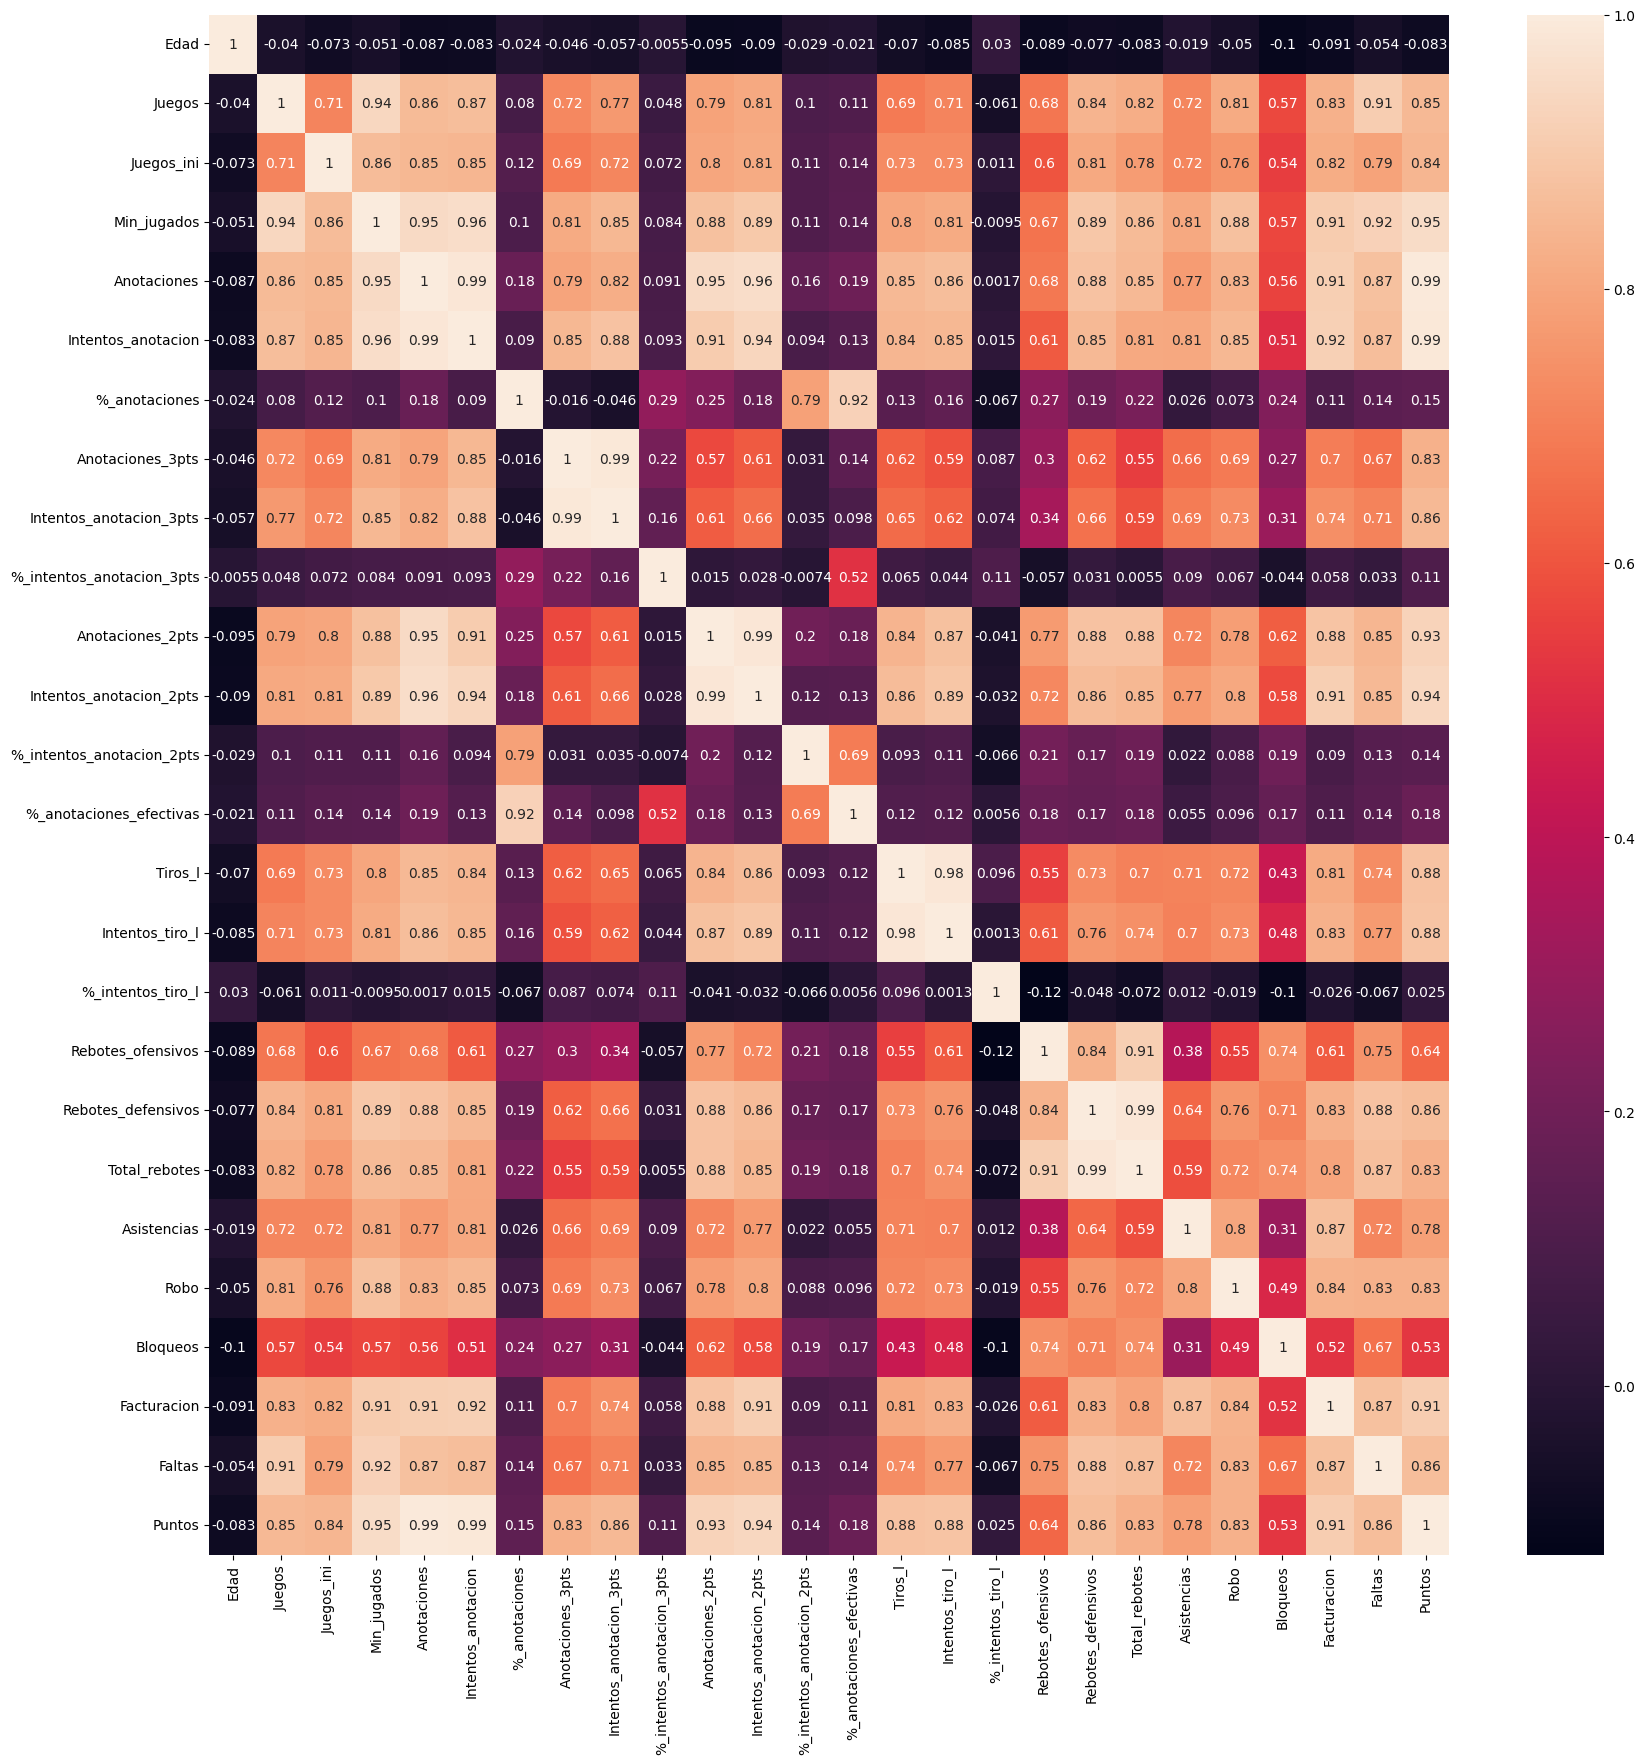

In [ ]:
# Se crea un Hitmap para comprender la correlacion entre variables de manera más visual.
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

# Visualización de datos
---

Para enriquecer la narrativa y el impacto del análisis, se han proporcionado visualizaciones más detalladas y explicaciones de los hallazgos específicos en cada visualización.



A continuación se presentaran algunas hipotesis o preguntas de interes sobre el dataset.

In [ ]:
# Se importan las librerias de visualizacion necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

style.use('ggplot')

##Pregunta: ¿Cual es la distribucion de la edad de los jugadores de la NBA?##

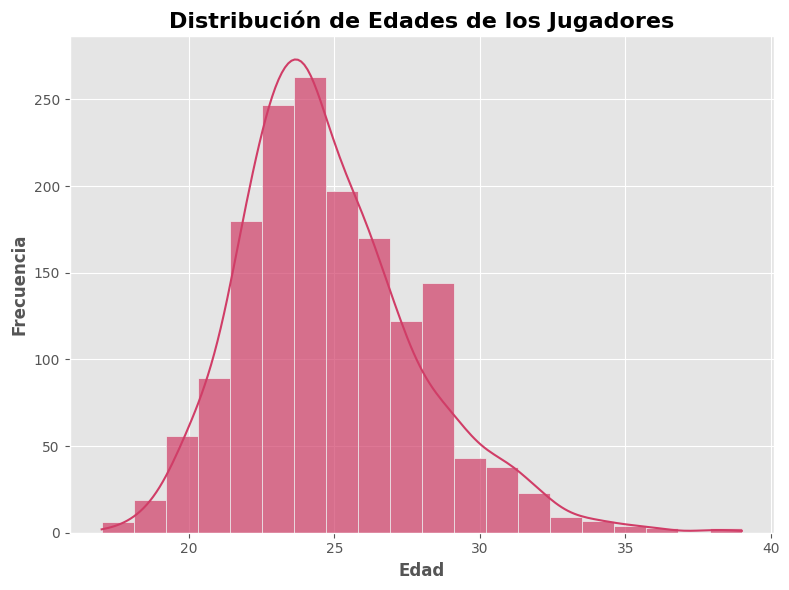

In [ ]:
# Visualizacion Univariado
# Histograma

"""
Podemos observar que la distribución tiene una forma descentrada sesgada hacia la izquierda, la mayoría de los jugadores tienen edades mayores
a la media y una menor cantidad tienen edades menores a la media. La distribución también tiene una moda alrededor de los 24 años ademas de
terner algunos datos atipicos hacia la derecha cercano a los 38 años de edad.
"""

# Crear figura y subplots
fig, ax = plt.subplots(figsize=(8,6))

# Graficar histograma y línea de densidad
sns.histplot(df['Edad'], bins=20, color='#D03D67', kde=True, alpha=0.7, ax=ax)

# Añadir títulos y etiquetas de los ejes
ax.set_title('Distribución de Edades de los Jugadores', fontsize=16, fontweight='bold')
ax.set_xlabel('Edad', fontsize=12, fontweight='bold')
ax.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')

# Ajustar los márgenes y mostrar el gráfico
plt.tight_layout()
plt.show()

# Resultados
---

En la primera visualización, se presentó un histograma de la distribución de edades de los jugadores de la NBA. La forma descentrada sesgada hacia la izquierda sugiere que la mayoría de los jugadores tienen edades mayores a la media, lo que podría influir en las decisiones de reclutamiento y selección de jugadores jóvenes para el equipo.

##Recomendaciónes:##

**Reclutamiento y selección de jugadores:** Dado que la mayoría de los jugadores tienen edades mayores a la media y la distribución tiene una moda alrededor de los 24 años, el equipo podría enfocarse en reclutar jugadores jóvenes y talentosos que estén en la etapa inicial de sus carreras. Esto podría implicar invertir en programas de detección de talento y scouts para identificar a jugadores prometedores en edades más tempranas.

**Análisis de riesgos y lesiones:** El equipo debe considerar los posibles riesgos asociados con la edad de los jugadores y las lesiones relacionadas. Al tener una mayor proporción de jugadores mayores, existe un mayor riesgo de lesiones y una posible disminución en el rendimiento. Por lo tanto, se deben implementar programas de prevención de lesiones y monitoreo médico regular para asegurar la salud y el rendimiento óptimo de los jugadores.


---

##Hipotesis: Los equipos que invierten mayor cantidad de dinero en la facturacion de sus jugadores tienen mayor cantidad de puntos de anotacion.##

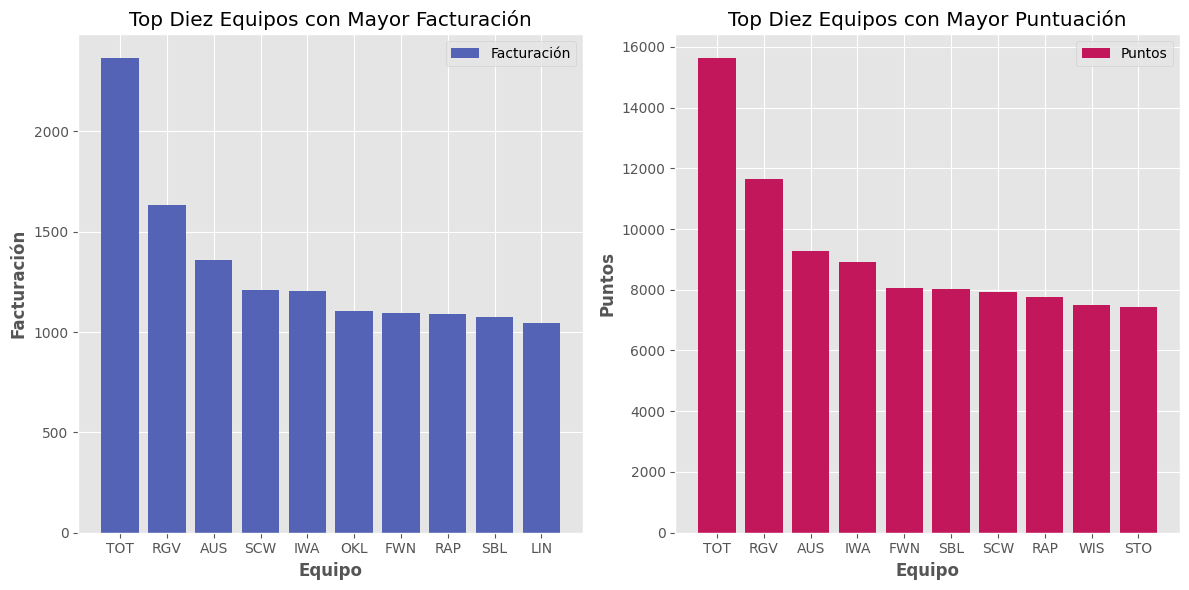

In [ ]:
# Visualizacion Bivariada
# Diagrama de barras

"""
Existe una correlación positiva entre la inversión en jugadores y el éxito en el campo, de hecho se puede ver como en los primeros tres equipos (TOT, RGV, AUS), se presenta de mayor manera este caso,
por otro lado el equipo WIS se muestra en el puesto 9 con mayor puntos sin estar dentro del top 10 de equipos con mayor inversion en la facturacion, a pesar de esto no implica necesariamente una
relación causal directa entre ambas variables.
Los equipos que tienen más recursos financieros pueden permitirse contratar a los mejores jugadores y tener más profundidad en su plantel. Sin embargo, también
hay otros factores importantes que influyen en el rendimiento de un equipo, como la estrategia del entrenador, la química entre los jugadores y el nivel de competencia
en la liga. Por lo tanto, hay muchos factores que deben tenerse en cuenta al evaluar el rendimiento de un equipo en el campo.
"""

# Calcular facturación y puntos por equipo
facturacion_equipo = df.groupby('Equipo')['Facturacion'].sum()
puntos_equipo = df.groupby('Equipo')['Puntos'].sum()

# Ordenar equipos por facturación en orden descendente y seleccionar top 10
top_5_facturacion = facturacion_equipo.sort_values(ascending=False).head(10)
top_5_puntos = puntos_equipo.sort_values(ascending=False).head(10)

# Crear figura y subplots
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Graficar primer subplot: facturación por equipo
axs[0].bar(top_5_facturacion.index, top_5_facturacion.values, color='#5463B5', label='Facturacion')
axs[0].set_title('Top Diez Equipos con Mayor Facturación')
axs[0].set_xlabel('Equipo', fontweight='bold')
axs[0].set_ylabel('Facturación', fontweight='bold')
axs[0].legend(['Facturación'])

# Graficar segundo subplot: puntos por equipo
axs[1].bar(top_5_puntos.index, top_5_puntos.values, color='#C2185B', label='Puntos')
axs[1].set_title('Top Diez Equipos con Mayor Puntuación')
axs[1].set_xlabel('Equipo', fontweight='bold')
axs[1].set_ylabel('Puntos', fontweight='bold')
axs[1].legend(['Puntos'])

# Mostrar gráfico
plt.tight_layout()
plt.show()

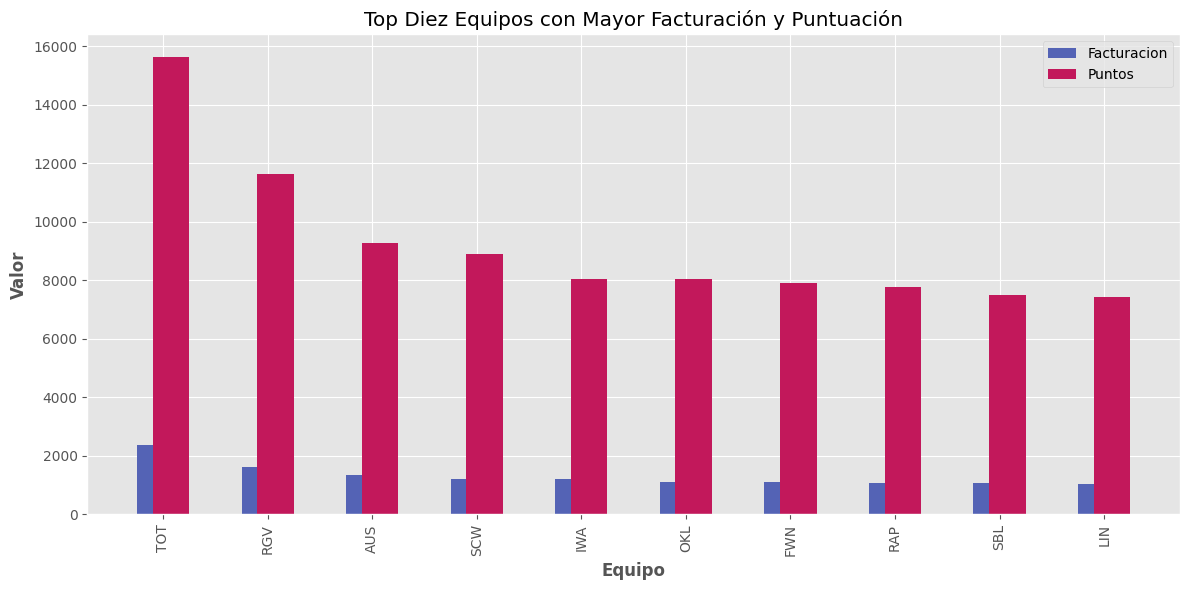

In [ ]:
# Misma hipotesis
# Visualizacion Bivariada
# Diagrama de barras conjuntas

# Calcular facturación y puntos por equipo
facturacion_equipo = df.groupby('Equipo')['Facturacion'].sum()
puntos_equipo = df.groupby('Equipo')['Puntos'].sum()

# Ordenar equipos por facturación en orden descendente y seleccionar top 10
top_5_facturacion = facturacion_equipo.sort_values(ascending=False).head(10)
top_5_puntos = puntos_equipo.sort_values(ascending=False).head(10)

# Crear figura y subplots
fig, axs = plt.subplots(figsize=(12, 6))

# Crear los arrays con los datos de facturación y puntos
facturacion_array = top_5_facturacion.values
puntos_array = top_5_puntos.values

# Crear la variable que contendrá las etiquetas de los equipos
equipos = top_5_facturacion.index

# Definir el ancho de las barras y la separación entre grupos
ancho_barra = 0.35
separacion_grupos = 0.15

# Calcular la posición de los grupos en el eje x
posicion_grupos = np.arange(len(equipos))

# Graficar los datos de facturación y puntos como barras agrupadas
axs.bar(posicion_grupos - separacion_grupos/2, facturacion_array, ancho_barra, label='Facturacion', color='#5463B5')
axs.bar(posicion_grupos + separacion_grupos/2, puntos_array, ancho_barra, label='Puntos', color='#C2185B')

# Configurar el eje x con las etiquetas de los equipos
axs.set_xticks(posicion_grupos)
axs.set_xticklabels(equipos)
axs.tick_params(axis='x', labelrotation=90)

# Agregar leyendas, títulos y etiquetas de los ejes
axs.legend()
axs.set_title('Top Diez Equipos con Mayor Facturación y Puntuación')
axs.set_xlabel('Equipo', fontweight='bold')
axs.set_ylabel('Valor', fontweight='bold')

# Mostrar gráfico
plt.tight_layout()
plt.show()

# Resultados
---

En la segunda visualización, se exploró la correlación entre la inversión en facturación de jugadores y la cantidad de puntos anotados. Se identificó una tendencia positiva, lo que sugiere que los equipos que invierten más en jugadores tienden a tener una mayor puntuación en los partidos. Sin embargo, también se enfatizó la necesidad de considerar otros factores, como la estrategia del entrenador y la química del equipo, al evaluar el rendimiento general del equipo.

##Recomendaciones:##

**Estrategia de inversión en jugadores:** Si la hipótesis se confirma y se encuentra una correlación positiva entre la inversión en jugadores y el éxito en el campo, el equipo podría considerar destinar una mayor parte de su presupuesto a la contratación de jugadores de alto rendimiento. Esto implica identificar y fichar a jugadores destacados que se ajusten al estilo de juego y las necesidades del equipo.

**Gestión financiera y presupuestaria:** Si se confirma la correlación entre inversión y éxito en el campo, el equipo debe realizar una gestión financiera adecuada para asegurarse de contar con los recursos necesarios para invertir en jugadores de calidad. Esto implica establecer un presupuesto que permita la contratación y retención de jugadores clave, al mismo tiempo que se mantienen las finanzas del equipo en equilibrio.

---

##Hipotesis: Los jugadores con mayor cantidad de robos cometen menos cantidad de faltas respecto a los con mayor cantidad de bloqueos.##

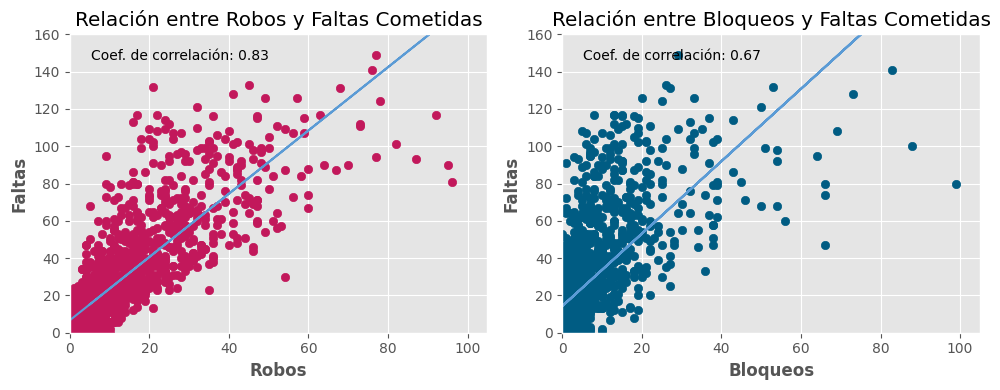

In [ ]:
# Visualizacion Bivariada
# Diagrama de dispersion

"""
En la primera subfigura, se puede observar que existe una relación positiva entre la cantidad de robos realizados y la cantidad de faltas cometidas. Esto significa
 que los jugadores que realizan más robos tienden a cometer más faltas en el transcurso de la temporada. El coeficiente de correlación positivo indica que esta
 relación es estadísticamente significativa.

En la segunda subfigura, se puede observar que también existe una relación positiva entre la cantidad de bloqueos realizados y la cantidad de faltas cometidas.
Los jugadores que realizan más bloqueos tienden a cometer más faltas en promedio. Sin embargo, la correlación entre estas variables es más débil que la correlación
observada en la primera subfigura.

En general, estos gráficos sugieren que existe una relación entre la cantidad de robos y bloqueos realizados por los jugadores y la cantidad de faltas cometidas,
lo que puede tener implicaciones importantes para la estrategia de juego y la gestión de jugadores en un equipo de baloncesto.
"""

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

# Graficar la primera subfigura
ax1.scatter(df['Robo'], df['Faltas'], color='#C2185B')
z = np.polyfit(df['Robo'], df['Faltas'], 1)
p = np.poly1d(z)
ax1.plot(df['Robo'], p(df['Robo']), color='#5B9BD5')
corr = df['Robo'].corr(df['Faltas'])
ax1.text(0.05, 0.95, f'Coef. de correlación: {corr:.2f}', transform=ax1.transAxes, va='top', ha='left')
ax1.set_xlabel('Robos', fontweight='bold')
ax1.set_ylabel('Faltas', fontweight='bold')
ax1.set_title('Relación entre Robos y Faltas Cometidas')
ax1.set_xlim(0, 105)
ax1.set_ylim(0, 160)


# Graficar la segunda subfigura
ax2.scatter(df['Bloqueos'], df['Faltas'], color="#005C83")
z = np.polyfit(df['Bloqueos'], df['Faltas'], 1)
p = np.poly1d(z)
ax2.plot(df['Bloqueos'], p(df['Bloqueos']), color="#5B9BD5")
corr = df['Bloqueos'].corr(df['Faltas'])
ax2.text(0.05, 0.95, f'Coef. de correlación: {corr:.2f}', transform=ax2.transAxes, va='top', ha='left')
ax2.set_xlabel('Bloqueos', fontweight='bold')
ax2.set_ylabel('Faltas', fontweight='bold')
ax2.set_title('Relación entre Bloqueos y Faltas Cometidas')
ax2.set_xlim(0, 105)
ax2.set_ylim(0, 160)

# Ajustar los márgenes y mostrar el gráfico
plt.tight_layout()
plt.show()

# Resultados
---

En la tercera visualización, se analizó la relación entre los robos y bloqueos realizados por los jugadores y la cantidad de faltas cometidas. Se encontró que los jugadores con más robos tienden a cometer más faltas ya que tiene una  correlación de 0.83. Esta información es crucial para mejorar la estrategia de juego y la gestión de jugadores, ya que el equipo debe encontrar un equilibrio entre generar jugadas defensivas y evitar faltas costosas.

##Recomendaciones:##

**Evaluación de jugadores:** Es importante analizar el desempeño individual de los jugadores en términos de robos, bloqueos y faltas cometidas. Identificar a los jugadores que se destacan en términos de robos y bloqueos, y al mismo tiempo tienen un menor número de faltas, puede ser beneficioso para el equipo. Estos jugadores podrían ser considerados como elementos clave para reforzar la defensa y generar oportunidades ofensivas sin incurrir en costosas faltas.

**Desarrollo, entrenamiento y control de agresividad:** Al conocer la relación entre robos, bloqueos y faltas cometidas, el equipo puede enfocarse en el desarrollo y entrenamiento de los jugadores para mejorar su habilidad defensiva sin sacrificar su capacidad para evitar faltas. Esto podría incluir trabajar en técnicas de robo, toma de decisiones defensivas y control de la agresividad para mantener un equilibrio entre la generación de jugadas defensivas y evitar faltas innecesarias.

---

##Pregunta: ¿Cual es la distribución de puntos por minutos jugados de los jugadores de la NBA?##

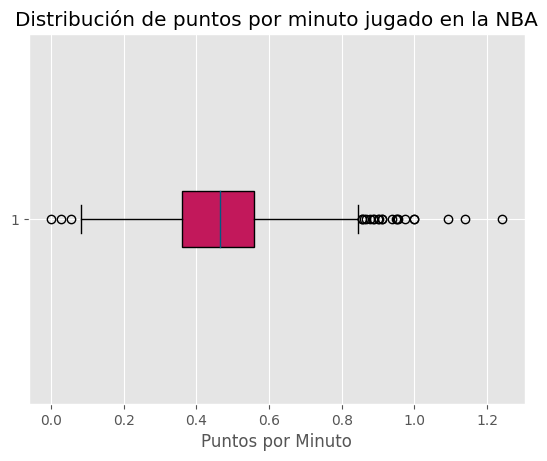

In [ ]:
# Visualizacion Bivariada
# Diagrama de bigotes

"""
El gráfico muestra que la mayoría de los jugadores tienen una puntuación por minuto entre 0 y 0.9, y
La mediana se encuentra cercana a 0.47 aprox.
Q1 = 25% = 0.36
Q2 = 50% = 0.47
Q3 = 75% = 0.56
hay algunos valores atípicos que tienen una puntuación por minuto superior a 1.2 y otros que llegan a 0.
Esto significa que estos jugadores pueden anotar una cantidad significativa de puntos en un corto período de tiempo.
"""

# Calcular la métrica de puntos por minuto jugado
df['Puntos por Minuto'] = df['Puntos'] / df['Min_jugados']

# Ordenar los valores de puntos por minuto en orden descendente
sorted_ppm = df.sort_values('Puntos por Minuto', ascending=False)['Puntos por Minuto']

# Crear el gráfico de diagrama de bigotes
plt.boxplot(sorted_ppm, vert=False, patch_artist=True,
            boxprops=dict(facecolor='#C2185B'),
            medianprops=dict(color='#005C83'))

plt.title("Distribución de puntos por minuto jugado en la NBA")
plt.xlabel("Puntos por Minuto")
plt.show()

# Resultados
---

En la cuarta visualización, se examinó la distribución de puntos por minuto jugado de los jugadores de la NBA. Se destacó que la mayoría de los jugadores tienen una puntuación por minuto entre 0 y 0.9, con algunos valores atípicos que anotan una cantidad significativa de puntos en un corto período de tiempo.

##Recomendaciones:##

**Evaluación de jugadores clave:** Es importante analizar detalladamente la puntuación por minuto de cada jugador. Identificar aquellos jugadores que tienen una puntuación por minuto alta, especialmente aquellos que superan 1.2, puede indicar su capacidad para anotar una cantidad significativa de puntos en un corto período de tiempo. Estos jugadores pueden ser considerados como elementos clave en situaciones de juego en las que se requiere un impulso ofensivo rápido.

**Desarrollo de jugadores en deficit:** Para aquellos jugadores que tienen una puntuación por minuto baja o se encuentran por debajo de la mediana, se pueden implementar programas de desarrollo específicos para mejorar su eficiencia en la anotación. Esto puede incluir trabajar en habilidades ofensivas, toma de decisiones, técnica de tiro y resistencia física, con el objetivo de aumentar su puntuación por minuto y su contribución en el aspecto ofensivo.

---

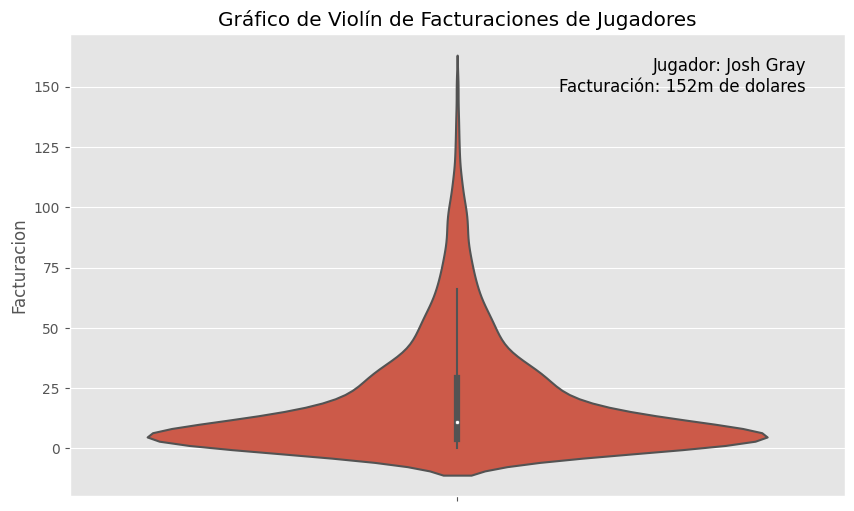

In [ ]:
# Crear el gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y='Facturacion')
plt.ylabel('Facturacion')
plt.title('Gráfico de Violín de Facturaciones de Jugadores')

# Encontrar al jugador con la mayor facturación
jugador_mayor_facturacion = df[df['Facturacion'] == df['Facturacion'].max()]

# Mostrar el nombre del jugador con mayor facturación
nombre_jugador_mayor_facturacion = jugador_mayor_facturacion.index[0]
facturacion_mayor = jugador_mayor_facturacion.iloc[0]['Facturacion']

# Anotar la información en la esquina superior derecha del gráfico
plt.annotate(f"Jugador: {nombre_jugador_mayor_facturacion}\nFacturación: {facturacion_mayor}m de dolares",
             xy=(0.95, 0.95),  # Coordenadas ajustadas para la esquina superior derecha
             xycoords='axes fraction',
             fontsize=12,
             ha='right',  # Alineación horizontal a la derecha
             va='top')    # Alineación vertical en la parte superior

plt.show()

# Resultados
---

El gráfico muestra la distribución de facturaciones de los jugadores, y la anotación en la esquina superior derecha destaca la información sobre el jugador con la mayor facturación en el conjunto de datos. Josh Gray con una facturacion de 152m de dolares.

##Recomendaciones:##

**Análisis de Retorno de la Inversión (ROI):** A medida que avance la colaboración con el jugador clave, realizar un seguimiento exhaustivo del retorno de la inversión. Evaluar cómo la asociación contribuye a la mejora de la imagen de marca, el aumento de las ventas y el crecimiento del negocio.

**Oportunidades de Patrocinio:** Explorar la posibilidad de establecer acuerdos de patrocinio con el jugador, lo que podría llevar a un mayor reconocimiento de marca y exposición. Esta asociación podría incluir campañas publicitarias, colaboraciones en redes sociales y participación en eventos promocionales.

---

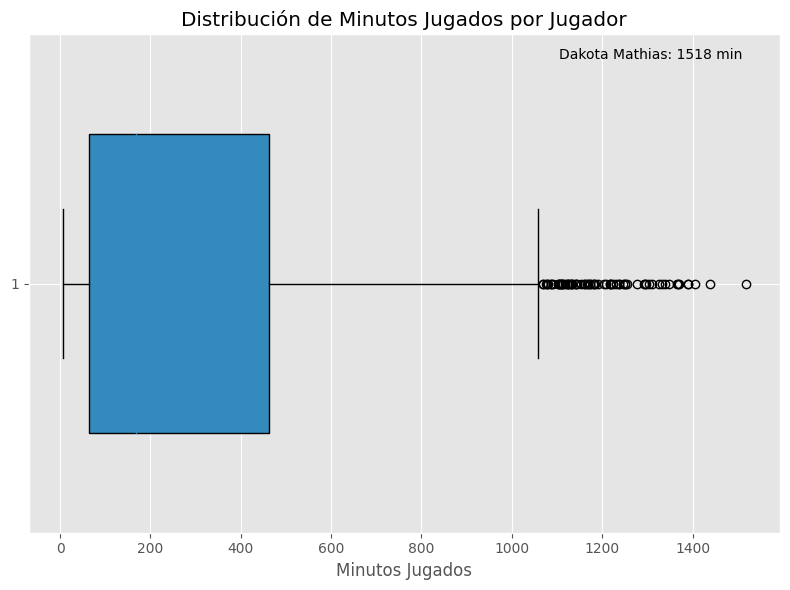

In [ ]:
# Crear un gráfico de caja de los minutos jugados
plt.figure(figsize=(8, 6))
plt.boxplot(df['Min_jugados'], vert=False, widths=0.6, showfliers=True, patch_artist=True)
plt.xlabel('Minutos Jugados')
plt.title('Distribución de Minutos Jugados por Jugador')
plt.tight_layout()

# Identificar el jugador con la mayor cantidad de minutos jugados
max_minutos = df['Min_jugados'].max()
jugador_max_minutos = df[df['Min_jugados'] == max_minutos].index[0]

# Mostrar el nombre del jugador con mayor cantidad de minutos jugados en la esquina superior derecha
plt.annotate(f'{jugador_max_minutos}: {max_minutos} min',
             xy=(max_minutos, 1),
             xytext=(0.95, 0.95),
             textcoords='axes fraction',
             color='black',
             fontsize=10,
             ha='right')

# Mostrar el gráfico de caja
plt.show()

# Resultados
---

Este gráfico representa la distribución de los minutos jugados por los jugadores, y Dakota Mathias es el jugador con la mayor cantidad de minutos jugados (1518 minutos) en el conjunto de datos.

##Recomendaciones:##

**Comunicación Abierta:** Mantener una comunicación constante con Dakota Mathias sobre su estado físico, emocional y mental es fundamental. Esto puede ayudar a tomar decisiones informadas sobre su participación en los juegos y garantizar que esté en las mejores condiciones para contribuir al éxito del equipo.

**Entrenamiento de Jugadores Emergentes:** Dado que Dakota Mathias ha demostrado tener una gran cantidad de minutos jugados, considerar la formación y el desarrollo de otros jugadores para que puedan desempeñar roles similares puede ser valioso. Preparar a otros jugadores para asumir responsabilidades en el campo puede ayudar a mantener el rendimiento del equipo en caso de lesiones o fatiga.

---

# Feature Selection
---

La selección adecuada de características es esencial para el éxito del modelo predictivo. En esta sección, se describe el proceso de selección de características realizado para identificar y utilizar únicamente aquellas variables que aportan mayor poder predictivo. Se explica cómo esta elección impacta positivamente en la calidad y eficiencia del modelo final.



In [ ]:
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir las características (X) y la variable objetivo (y)
X = df.iloc[:, 1:]  # Excluye la columna "Equipo"
y = df["Puntos"]  # Variable objetivo: "Puntos"

# Implementar la función para realizar Forward Selection
def forward_selection(X, y, initial_list=[], threshold_in=0.01, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            if verbose:
                print(f'Added feature: {best_feature} (p-value={best_pval})')
            changed = True
        if not changed:
            break
    return included

    # Llamar a la función forward_selection
selected_features = forward_selection(X, y)
print(f'Selected Features: {selected_features}')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el objeto SelectKBest y aplicar la selección de características
k = 10  # Número de características a seleccionar
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Obtener las características seleccionadas
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]



<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Robo (p-value=0.0)
Added feature: Anotaciones (p-value=0.0)
Added feature: Puntos (p-value=0.0)


<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Min_jugados (p-value=1.0776234675620705e-10)
Added feature: Total_rebotes (p-value=1.1455105134488712e-14)
Added feature: Rebotes_ofensivos (p-value=4.95256448876863e-09)


<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Bloqueos (p-value=9.721130723639723e-16)
Added feature: Intentos_anotacion_2pts (p-value=1.9366205271592033e-07)


<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Faltas (p-value=5.583995532213806e-10)
Added feature: Intentos_anotacion_3pts (p-value=0.009691374437005034)


<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Intentos_anotacion (p-value=2.2918182252973325e-06)
Added feature: Anotaciones_2pts (p-value=5.883639015205153e-19)


<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Juegos_ini (p-value=1.398603975304542e-07)
Added feature: Facturacion (p-value=5.0945390277720214e-11)
Added feature: Tiros_l (p-value=2.6938564521374255e-07)


<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-6-4543633c91c8>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Rebotes_defensivos (p-value=6.262579324214046e-05)
Selected Features: ['Robo', 'Anotaciones', 'Puntos', 'Min_jugados', 'Total_rebotes', 'Rebotes_ofensivos', 'Bloqueos', 'Intentos_anotacion_2pts', 'Faltas', 'Intentos_anotacion_3pts', 'Intentos_anotacion', 'Anotaciones_2pts', 'Juegos_ini', 'Facturacion', 'Tiros_l', 'Rebotes_defensivos']


#Elección de algoritmo de regresión
---

En esta etapa del proyecto, se evalua la idoneidad del algoritmo de regresion elegido para el conjunto de datos específico.

In [ ]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_selected, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_selected)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Robo (p-value=0.0)
Added feature: Anotaciones (p-value=0.0)
Added feature: Puntos (p-value=0.0)


<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Min_jugados (p-value=1.0776234675620705e-10)
Added feature: Total_rebotes (p-value=1.1455105134488712e-14)
Added feature: Rebotes_ofensivos (p-value=4.95256448876863e-09)
Added feature: Bloqueos (p-value=9.721130723639723e-16)


<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Intentos_anotacion_2pts (p-value=1.9366205271592033e-07)


<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Faltas (p-value=5.583995532213806e-10)


<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Intentos_anotacion_3pts (p-value=0.009691374437005034)


<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Intentos_anotacion (p-value=2.2918182252973325e-06)


<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Anotaciones_2pts (p-value=5.883639015205153e-19)


<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Juegos_ini (p-value=1.398603975304542e-07)


<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Facturacion (p-value=5.0945390277720214e-11)


<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Tiros_l (p-value=2.6938564521374255e-07)


<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Added feature: Rebotes_defensivos (p-value=6.262579324214046e-05)


<ipython-input-2-d0aa2db5712c>:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Selected Features: ['Robo', 'Anotaciones', 'Puntos', 'Min_jugados', 'Total_rebotes', 'Rebotes_ofensivos', 'Bloqueos', 'Intentos_anotacion_2pts', 'Faltas', 'Intentos_anotacion_3pts', 'Intentos_anotacion', 'Anotaciones_2pts', 'Juegos_ini', 'Facturacion', 'Tiros_l', 'Rebotes_defensivos']


#Calculo de metricas de evaluación
---

En esta sección, se presentan las diferentes métricas de evaluación utilizadas para medir el rendimiento y la precisión del modelo de regresión empleado en el análisis. Se explican en detalle cómo se calcularon y se interpretan los resultados obtenidos para respaldar la selección del modelo.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Calcular el MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular el RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Imprimir las métricas
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 282.49320211844525
R-squared (R2) Score: 0.9882932605729046
Mean Absolute Error (MAE): 4.260632322125949
Root Mean Squared Error (RMSE): 16.807534087975107


Metricas

Mean Squared Error (MSE): El Error Cuadrático Medio representa el promedio de los errores al cuadrado entre los valores reales y las predicciones del modelo. Cuanto menor sea el MSE, mejor será el ajuste del modelo a los datos. En este caso, el MSE es 282.49, lo que indica que, en promedio, el modelo tiene un error cuadrático medio de aproximadamente 282.49 unidades al cuadrado.

R-squared (R2) Score: El Coeficiente de Determinación R2 indica la proporción de la varianza en la variable objetivo que puede explicarse por el modelo. Varía entre 0 y 1, donde 1 indica un ajuste perfecto del modelo a los datos. En tu caso, el R2 es 0.988, lo que implica que el modelo es capaz de explicar aproximadamente el 98.8% de la varianza en los datos de la variable objetivo.

Mean Absolute Error (MAE): El Error Absoluto Medio representa el promedio de los errores absolutos entre los valores reales y las predicciones del modelo. Es una medida de la magnitud promedio de los errores del modelo. En este caso, el MAE es 4.26, lo que significa que, en promedio, el modelo tiene un error absoluto medio de aproximadamente 4.26 unidades.

Root Mean Squared Error (RMSE): La Raíz del Error Cuadrático Medio es simplemente la raíz cuadrada del MSE y proporciona una medida de la desviación estándar de los errores del modelo. Al igual que el MSE, cuanto menor sea el RMSE, mejor será el ajuste del modelo a los datos. En este caso, el RMSE es 16.81, lo que indica que, en promedio, el modelo tiene una desviación estándar de aproximadamente 16.81 unidades en sus errores.



#Resultados del modelo

---

En general, estos resultados indican que el modelo tiene un ajuste bastante bueno a los datos. El MSE y el RMSE son relativamente bajos, lo que implica que los errores del modelo son pequeños en promedio. El R2 es alto, lo que sugiere que el modelo es capaz de explicar la mayor parte de la varianza en los datos de la variable objetivo. El MAE también es bajo, lo que indica que los errores del modelo tienen una magnitud promedio relativamente pequeña.

# Concluciones finales

---

En conclusión, este análisis de datos de estadísticas individuales de jugadores de la NBA ha proporcionado información valiosa para entrenadores, ejecutivos de equipos y fanáticos del baloncesto. Al conectar las visualizaciones y los resultados con los objetivos del proyecto, se ha demostrado cómo los datos pueden influir en el rendimiento y las decisiones estratégicas de los equipos. La limpieza y preparación cuidadosa de los datos han garantizado la precisión de los resultados y la confiabilidad de las recomendaciones. Este proyecto destaca la importancia de utilizar técnicas de análisis de datos para obtener una comprensión más profunda del juego y fomentar un enfoque informado hacia el rendimiento y la toma de decisiones en la NBA.